# Fashion Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
fashion_df = pd.read_csv("fashiondataset.csv")
fashion_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [3]:
fashion_df.brand.value_counts()

Roadster                      346
Tokyo Talkies                 287
MANGO                         264
SASSAFRAS                     246
Clora Creation                236
                             ... 
PrettyPlus by Desinoor.com      1
MISHRI COLLECTION               1
Fabcartz                        1
Rivana                          1
tantkatha                       1
Name: brand, Length: 1020, dtype: int64

In [4]:
brand_df = pd.read_excel('fashion_brand_details.xlsx')
brand_df.head()

,brand_id,brand_name
0,1,513
1,2,109F
2,3,20Dresses
3,4,250 Designs
4,5,3Pin


In [5]:
brand_df.brand_name.value_counts()

513                      1
Pisara                   1
Pashmoda                 1
Pashtush                 1
Patrorna                 1
                        ..
Grass By Gitika Goyal    1
Griffel                  1
Gritstones               1
Grubstaker               1
Zola                     1
Name: brand_name, Length: 1020, dtype: int64

### 1. SQL implementation to create a main dataframe from the two csv files

In [6]:
# convert pandas dataframe to sqlite table
import sqlite3

conn = sqlite3.connect('fashion.db')
c = conn.cursor()

# creating the fashion table in the database
fashion_df.to_sql('fashion', conn, if_exists='replace', index = False)

# creating the brand table in the database
brand_df.to_sql('brand', conn, if_exists='replace', index = False)



In [7]:
# check if the tables are created in the database
p = """
SELECT name FROM sqlite_master WHERE type='table';
"""
#conn = sqlite3.connect('fashion.db')
#c = conn.cursor()
c.execute(p)
print(c.fetchall())

[('fashion',), ('brand',)]


In [8]:
# select from the fashion table

q = """
SELECT * FROM fashion LIMIT 10;
"""
pd.read_sql(q, conn)

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."
5,12742100.0,KASSUALLY Women Black & Pink Printed Basic Jum...,2199.0,Black,KASSUALLY,6297.0,4.349214,"Black printed basic jumpsuit, has a V-neck, lo...",{'Body or Garment Size': 'Garment Measurements...
6,13842966.0,Sassafras Brown & Red Geometric Printed George...,1499.0,Brown,SASSAFRAS,7358.0,4.395352,<ul><li>Brown and red crop wrap top</li><li>Pr...,"{'Body Shape ID': '333,424', 'Body or Garment ..."
7,14021452.0,Sera Women Multicoloured Printed Tie-Up Shrug,1494.0,Multi,Sera,750.0,4.288000,"Brown and blue printed tie-up longline shrug, ...",{'Body or Garment Size': 'To-Fit Denotes Body ...
8,14063026.0,Tokyo Talkies Women Black Solid Regular Shorts,699.0,Black,Tokyo Talkies,1856.0,4.530711,"Black solid mid-rise regular shorts, has 2 poc...",{'Body or Garment Size': 'To-Fit Denotes Body ...
9,14324806.0,Anouk Stylish Black Solid Ready to Wear Leheng...,4699.0,Black,Anouk,84.0,3.809524,Stay fashionable in any season when you don th...,"{'Blouse Closure': 'Zip', 'Blouse Fabric': 'Vi..."


In [9]:
# select the  brand table  

b = """
SELECT * FROM brand LIMIT 10;
"""
pd.read_sql(b, conn)

,brand_id,brand_name
0,1,513
1,2,109F
2,3,20Dresses
3,4,250 Designs
4,5,3Pin
5,6,6Y Collective
6,7,98 Degree North
7,8,9Teenagain
8,9,A Little Fable
9,10,A.T.U.N.


In [10]:
# select data from both tables and create a main dataframe to be used for analysis

r = """
SELECT * FROM fashion
FULL OUTER JOIN brand
ON fashion.brand = brand.brand_name;
"""
main_df = pd.read_sql(r, conn)
main_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242.0,Dupatta Bazaar
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750.0,Roadster
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389.0,Inddus
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",NaN,None
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482.0,Kotty


In [11]:
main_df.isna().sum()

p_id             538
name             539
price            539
colour           542
brand            544
ratingCount     8268
avg_rating      8268
description      539
p_attributes     539
brand_id        6231
brand_name      6231
dtype: int64

In [12]:
# close the connection
conn.close()

### 2. Data Analysis of the new dataframe

In [17]:
main_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242.0,Dupatta Bazaar
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750.0,Roadster
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389.0,Inddus
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",NaN,None
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482.0,Kotty


In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14311 non-null  float64
 1   name          14310 non-null  object 
 2   price         14310 non-null  float64
 3   colour        14307 non-null  object 
 4   brand         14305 non-null  object 
 5   ratingCount   6581 non-null   float64
 6   avg_rating    6581 non-null   float64
 7   description   14310 non-null  object 
 8   p_attributes  14310 non-null  object 
 9   brand_id      8618 non-null   float64
 10  brand_name    8618 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.2+ MB


#### 2.1. Data Cleaning

In [19]:
# 1.check for missing data
missing_values=main_df.isnull().sum()
percent_missing = main_df.isnull().sum()/main_df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
p_id,538,3.623140
name,539,3.629874
price,539,3.629874
colour,542,3.650077
brand,544,3.663546
ratingCount,8268,55.680517
avg_rating,8268,55.680517
description,539,3.629874
p_attributes,539,3.629874
brand_id,6231,41.962422


The dataframe does not contain any missing values

In [25]:
# Dealing with missing data
# Replace the missing values with 0
main_df['p_id'] = main_df['p_id'].fillna(0)
main_df['brand_id'] = main_df['brand_id'].fillna(0)

# Replace the missing values with the mean
main_df['price'] = main_df['price'].fillna(main_df['price'].mean())
main_df['ratingCount'] = main_df['ratingCount'].fillna(main_df['ratingCount'].mean())
main_df['avg_rating'] = main_df['avg_rating'].fillna(main_df['avg_rating'].mean())

# Replace the missing values with a descriptive string "Missing"
main_df['name'] = main_df['name'].fillna('Missing')
main_df['brand'] = main_df['brand'].fillna('Missing')
main_df['colour'] = main_df['colour'].fillna('Missing')
main_df['description'] = main_df['description'].fillna('Missing')
main_df['brand_name'] = main_df['brand_name'].fillna('Missing')
main_df['p_attributes'] = main_df['p_attributes'].fillna('Missing')


In [27]:
# check for missing data
main_df.isna().sum()

p_id            0
name            0
price           0
colour          0
brand           0
ratingCount     0
avg_rating      0
description     0
p_attributes    0
brand_id        0
brand_name      0
dtype: int64

In [28]:
# 2.check if there any duplicated data in the dataframe
duplicate_1 = main_df[main_df.duplicated()]
if duplicate_1.empty== True:
    print("no duplicated data")
else:
    print("Duplicate Rows except first occurrence based on all columns are :")
    print(duplicate_1)

Duplicate Rows except first occurrence based on all columns are :
             p_id                                               name  \
219    19215754.0                BoStreet Women Maroon Flared Skirts   
437    18548534.0              MONTREZ Women Blue Denim Solid Skirts   
696           0.0                                            Missing   
847    18815858.0       Emprall Women Pink Solid Pleated Mini Skirts   
3025   18841582.0               Styli Women Black Solid A-Line Skirt   
3041   18485216.0      Hive91 Women Black Printed A-Line Maxi Skirts   
3053   18604646.0  Zink London Women Blue Floral  Lace Design Skirts   
3168   19235438.0  Oxolloxo Women Navy Blue Printed Knee-Length E...   
3394   10604482.0  SASSAFRAS Blue Washed Midi Denim Pure Cotton A...   
3426   13792358.0  U&F Red & White Printed Accordion Pleat Maxi F...   
3461   13626148.0   SASSAFRAS Burgundy Dobby Weave Maxi Flared Skirt   
3936   18879630.0           MANGO Lilac & Green Sequinned Mini Skirt  

In [29]:
# Dealing with duplicated data
main_df.drop_duplicates(keep='first',inplace=True)

In [30]:
main_df.duplicated().sum()

0

<AxesSubplot:>

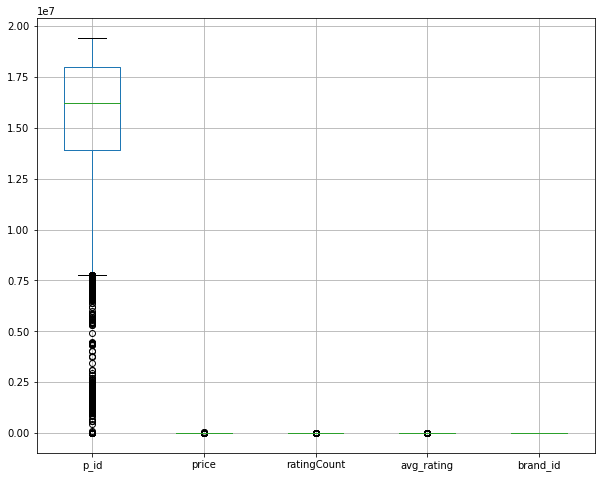

In [31]:
# 3. Checking for outliers 
main_df.boxplot(figsize=(10,8))

In [ ]:
# Dealing with outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

# main_df = remove_outliers(main_df, 'p_id')

In [32]:
main_df.describe()

,p_id,price,ratingCount,avg_rating,brand_id
count,1.479000e+04,14790.000000,14790.000000,14790.000000,14790.000000
mean,1.513582e+07,2967.534344,184.557208,4.101238,304.013117
std,4.239025e+06,2520.976470,521.910392,0.316697,344.553680
min,0.000000e+00,169.000000,1.000000,1.000000,0.000000
25%,1.390130e+07,1599.000000,29.000000,4.101226,0.000000
50%,1.623490e+07,2299.000000,184.479410,4.101226,133.000000
75%,1.800389e+07,3372.500000,184.479410,4.120000,595.000000
max,1.941576e+07,47999.000000,21274.000000,5.000000,1020.000000


In [33]:
main_df.columns

Index(['p_id', 'name', 'price', 'colour', 'brand', 'ratingCount', 'avg_rating',
       'description', 'p_attributes', 'brand_id', 'brand_name'],
      dtype='object')

### 3. Analysis of the data and visualization

Questions to answer:
<ol start=1>
<li> What is the most popular brand?</li>
<li> what are the most expensive brands?</li>
<li> what is the relationship between price and avg_rating?</li>
<li> what is the relationship of the features to each other?</li>
</ol>

In [34]:
sns.set_style('darkgrid')

In [35]:
main_df['brand'].value_counts()

Missing          527
Roadster         346
Tokyo Talkies    286
MANGO            263
SASSAFRAS        244
                ... 
Virah Fashion      1
Color Trends       1
Dollar Missy       1
Nakshi             1
tantkatha          1
Name: brand, Length: 1021, dtype: int64

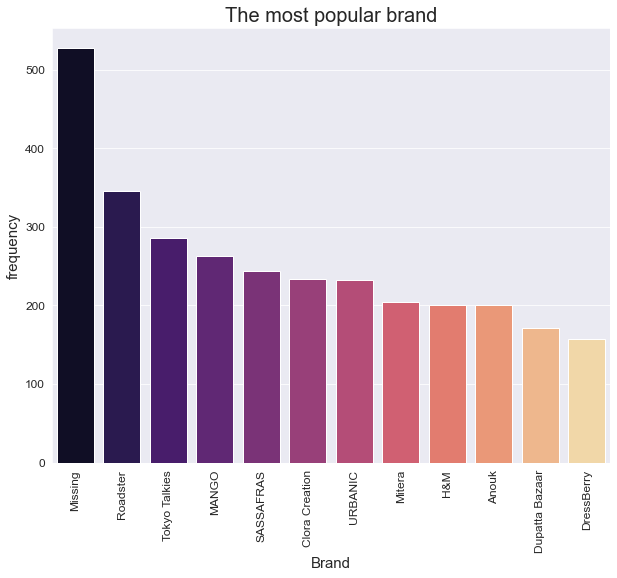

In [36]:
# What is the most popular brand?
plt.figure(figsize=(12,10))
sns.countplot(x='brand', data=main_df, order=main_df['brand'].value_counts().index[:12],palette='magma',orient='h')

plt.title('The most popular brand',fontsize=20)
plt.xlabel('Brand',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()


The most popular brands are Roadster ,however, the number of missing values for brand is very high.

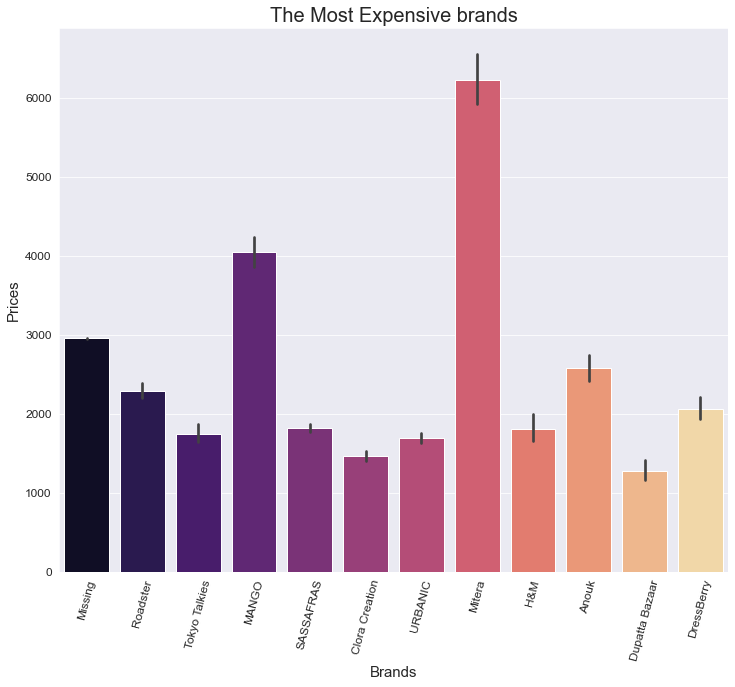

In [40]:
# what are the most expensive brands?
plt.figure(figsize=(12,10))
sns.barplot(x=main_df['brand'], y=main_df['price'] , data=main_df ,order=main_df['brand'].value_counts().index[:12],palette='magma')
plt.title("The Most Expensive brands",fontsize=20)
plt.xlabel("Brands",fontsize=15)
plt.ylabel("Prices",fontsize=15)
plt.xticks(rotation=75,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The most expensive brand is Mitera.

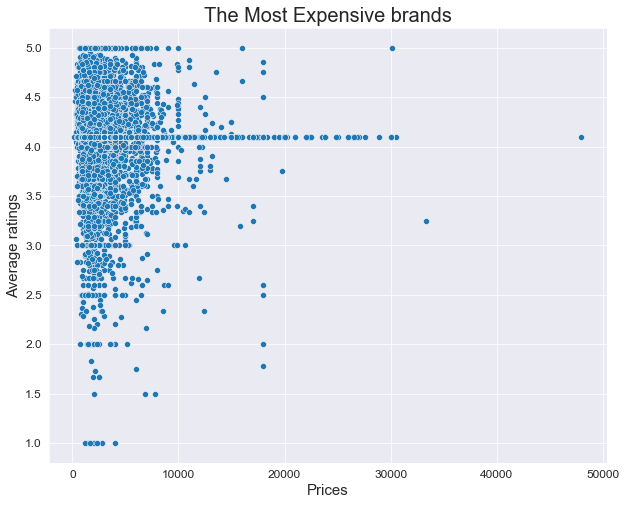

In [42]:
# what is the relationship between price and avg_rating
plt.figure(figsize=(10,8))
sns.scatterplot(data=main_df, x='price', y='avg_rating',palette='magma')
plt.title("The Most Expensive brands",fontsize=20)
plt.xlabel("Prices",fontsize=15)
plt.ylabel("Average ratings",fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

There is no linear relationship between average rating and price of the products

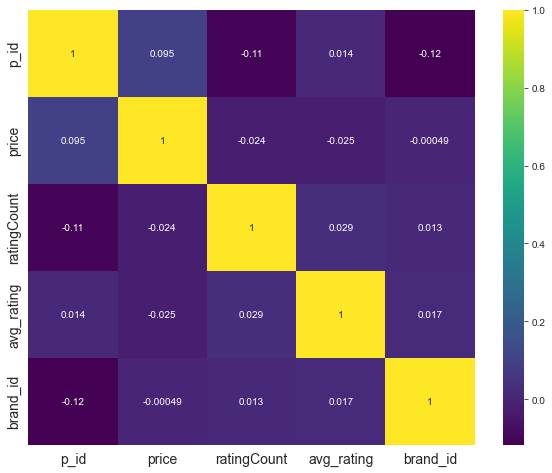

In [44]:
# what is the relationship of the features to each other?
# plotting a heatmap 
fig , ax = plt.subplots(figsize=(10,8))
sns.heatmap(main_df.corr(),annot=True,ax=ax, cmap='viridis')

plt.title("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 4. Preprocessing of the data

In [ ]:
main_df['p_attributes'].value_counts().index[:5]

In [46]:
main_df['description'].value_counts().index[:5]

Missing                                                                                                                                                                                                                                                                                                                                                                                 522
White light wash 5-pocket high-rise jeans, clean look with no fade, has a button and zip closure, waistband with belt loopsSlim fit<br>Stretchable<br>The model (height 5'8") is wearing a size 28Cotton, polyester and elastane<br>Machine-wash                                                                                                                                          3
Blue and gold-toned ethnic motifs embroidered dupatta chikankari,  fringed border<p>Dupatta length: 2.4 metres<br>Dupatta width: 0.9 metres</p>100% Net<br>Hand wash                                                                            

In [47]:
# dropping both the column p_attributes and description as they are text data 
main_df.drop(['p_attributes','description'],axis=1,inplace=True)

In [48]:
# dropping the brand_name column as it is a duplicate of the brand column
main_df.drop(['brand_name'],axis=1,inplace=True)

In [49]:
main_df.dtypes

p_id           float64
name            object
price          float64
colour          object
brand           object
ratingCount    float64
avg_rating     float64
brand_id       float64
dtype: object

In [50]:
# label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

def label_encoder(df, column):
    le = LabelEncoder()
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
    return df

main_df = label_encoder(main_df, 'brand')
main_df = label_encoder(main_df, 'colour')
main_df = label_encoder(main_df, 'name')

In [51]:
main_df.dtypes

p_id           float64
name             int64
price          float64
colour           int64
brand            int64
ratingCount    float64
avg_rating     float64
brand_id       float64
dtype: object

In [52]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

def scale_features(df, columns):
    sc = StandardScaler()
    for col in columns:
        if col in df.columns and df[col].dtype != 'object':
            df[col] = sc.fit_transform(df[col].values.reshape(-1,1))
    return df

main_df = scale_features(main_df, main_df.columns)

In [53]:
# feature selection
from sklearn.feature_selection import SelectKBest

def feature_selection(df, target, k):
    X = df.drop(target, axis=1)
    y = df[target]
    selector = SelectKBest(k=k)
    selector.fit(X, y)
    return X.columns[selector.get_support()]

features = feature_selection(main_df, 'price', 5)
features

Index(['p_id', 'name', 'brand', 'ratingCount', 'brand_id'], dtype='object')

In [54]:
# log transformation 

# def log_transformer(main_df, col):
    #for column in col:
        #main_df[column] = np.log(main_df[column])
    #return main_df

# main_df = log_transformer(main_df, main_df.columns)

In [55]:
# dropping unnecessary features
main_df.drop(['p_id'],axis=1,inplace=True)

In [56]:
# splitting the data into train and test set
from sklearn.model_selection import train_test_split

X = main_df.drop('price', axis=1)
y = main_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Models

In [57]:
# Linear Regression
from sklearn.linear_model import LinearRegression

def Modelling(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def Evaluation(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R2 Score: ', r2_score(y_test, y_pred))

y_pred  = Modelling(LinearRegression(), X_train, y_train, X_test, y_test)

In [58]:
# Evaluation of the base linear regression model
Evaluation(y_test, y_pred)

Mean Squared Error:  0.963195470724229
R2 Score:  0.006742244986454704


The performance of the baseline linear regression model was not satisfactory, as indicated by its R2 score of 0.9632 and Mean Squared Error of 0.00674.

The R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data. It ranges from 0 to 1, with higher values indicating a better fit. A negative R2 score indicates that the model is performing worse than a model that simply predicts the mean of the target variable.

The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the true values. It is used to evaluate the model's performance. A high MSE indicates that the model is not making accurate predictions.

In [59]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

y_pred1  = Modelling(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)
y_pred1

array([ 0.48850408, -0.50677884, -0.18546391, ..., -0.76105399,
       -0.78088825, -0.30486612])

In [60]:
# Evaluation of the decision tree model
Evaluation(y_test, y_pred1)

Mean Squared Error:  0.9726405327706834
R2 Score:  -0.0029976067979096133


The Decision tree model performed worse than the linear regression model, as indicated by its lower R2 score of -0.0029976 and higher Mean Squared Error (MSE) of 0.97264.

In [61]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

y_pred2  = Modelling(RandomForestRegressor(), X_train, y_train, X_test, y_test)
y_pred2

array([-0.20971724, -0.44172249, -0.23613646, ..., -0.5438689 ,
       -0.55083469, -0.22433905])

In [62]:
# Evaluation of the Random forest model
Evaluation(y_test, y_pred2)

Mean Squared Error:  0.5824676466417393
R2 Score:  0.3993529614125043


The Random forest model outperformed both the Decision tree model and the linear Regression model, as indicated by its higher R2 score and lower Mean Squared Error (MSE).In this case, the Random forest model had an R2 score of 0.39935 and an MSE of 0.5825

In [64]:
# tuning Random forest model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]   
}

grid = RandomizedSearchCV(RandomForestRegressor(), params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [65]:
# tuned Random forest model
y_pred3  = Modelling(RandomForestRegressor(n_estimators= 300, min_samples_split= 5, min_samples_leaf= 2, max_depth= 20), X_train, y_train, X_test, y_test)
y_pred3

array([-0.18301404, -0.33466642, -0.25958909, ..., -0.51331288,
       -0.47286351, -0.15142897])

In [66]:
# Evaluation of the tuned Random forest model
Evaluation(y_test, y_pred3)

Mean Squared Error:  0.5433147001870865
R2 Score:  0.43972791009085865


After adjusting the hyperparameters of the Random forest model through a process called "tuning," the model's performance improved. This was demonstrated by an increase in the R2 score to 0.43972 and a decrease in the Mean Squared Error (MSE) to 0.54331.

Overall, the tuning process resulted in an improvement in the performance of the Random forest model, as indicated by the higher R2 score and lower MSE.

In [67]:
# clustering
from sklearn.cluster import KMeans

def clustering(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    return kmeans

kmeans = clustering(main_df, 5)
kmeans.labels_


array([0, 3, 0, ..., 1, 1, 1], dtype=int32)

In [68]:
kmeans.cluster_centers_

array([[-9.60753458e-01, -9.63436118e-02,  7.00772661e-03,
        -9.79378724e-01, -4.97365321e-02,  1.50808210e-01,
        -5.10492782e-01],
       [ 6.41798603e-01,  5.95752487e-02, -9.53817094e-03,
         6.55584814e-01, -1.11770130e-03,  1.31705352e-01,
         1.31468954e+00],
       [ 9.10267525e-01,  9.89286206e-02, -2.34579050e-03,
         9.24681426e-01, -3.42875973e-02,  1.12263155e-01,
        -8.58604927e-01],
       [-1.95307606e-01, -3.65880071e-01, -2.55780839e-02,
        -1.66045759e-01,  1.45347597e+01,  2.30892463e-01,
        -2.26080020e-01],
       [-9.88031200e-02,  9.79569389e-03,  1.71170832e-02,
        -9.52646183e-02, -3.18786839e-01, -3.36245695e+00,
        -1.40228205e-01]])

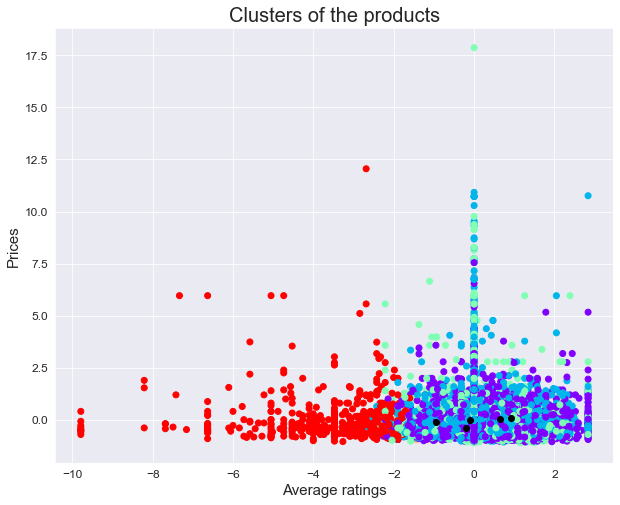

In [69]:
# plotting the clusters
plt.figure(figsize=(10,8))
plt.scatter(main_df['avg_rating'], main_df['price'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of the products",fontsize=20)
plt.xlabel("Average ratings",fontsize=15)
plt.ylabel("Prices",fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()